In [13]:
import requests
from bs4 import BeautifulSoup
import webbrowser
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.firefox.options import Options
from webdriver_manager.firefox import GeckoDriverManager

In [14]:
def find_lyrics_link(website, singer, song):
    # Format the query string
    query = f"{singer} {song}".replace(' ', '+')
    # Ensure the website variable is correctly formatted for the Google search
    formatted_website = website.replace('https://', '').replace('http://', '').rstrip('/')
    url = f"https://www.google.com/search?q=site:{formatted_website}+{query}"
    
    # Send the HTTP request
    response = requests.get(url)
    
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all the search result links
    links = soup.find_all('a')
    
    # Extract and return the first relevant link
    for link in links:
        href = link.get('href')
        if href and "url?q=" in href and not "webcache" in href:
            # Extract the URL from the Google redirect URL
            start = href.find("url?q=") + 6  # Adjust for the length of "url?q="
            end = href.find("&sa=U", start)
            clean_url = href[start:end]
            # Check if the clean_url starts with the website variable
            if clean_url.startswith(website):
                return clean_url
    return "No link found"

In [15]:

# specify the lyrics website
lyrics_website = "https://lyrics.lyricfind.com"

# Open Webbrower with the target website home page (in this case, the lyrics website) 
webbrowser.open(lyrics_website)


True

In [16]:
# Format the query string for google search of content on the targeted website.

#website = 'lyrics.lyricfind.com'
website_url = "https://lyrics.lyricfind.com"
singer = 'Queen'
song = 'We will rock you'
query = f"{singer} {song}".replace(' ', '+')
url = f"https://www.google.com/search?q=site:{website_url}+{query}"
    
print(f"URL for targeted website: {url}")

URL for targeted website: https://www.google.com/search?q=site:https://lyrics.lyricfind.com+Queen+We+will+rock+you


In [17]:
# Capture the Google search result page for the targeted website

# Send the HTTP request
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')


<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="AjoCq8Zg5PcXgfl/SoTikc1e/dzQCdxW0fvo8FxmdXtMpTHFSPThDszr2GTn4aDO9n/lpkW3Zv/js+E6AktuqgkAAABveyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>site:https://lyrics.lyricfind.com Queen We will rock you - Google Search</title><script nonce="eh44BU_qsbCY0uIw6SOwkQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref
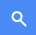

In [18]:
soup

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="AjoCq8Zg5PcXgfl/SoTikc1e/dzQCdxW0fvo8FxmdXtMpTHFSPThDszr2GTn4aDO9n/lpkW3Zv/js+E6AktuqgkAAABveyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   site:https://lyrics.lyricfind.com Queen We will rock you - Google Search
  </title>
  <script nonce="eh44BU_qsbCY0uIw6SOwkQ">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"==
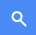

In [19]:
# pretty print the soup
print(soup.prettify())

In [21]:
lyrics_links = find_lyrics_link('https://lyrics.lyricfind.com', singer, song)
print(lyrics_links)

https://lyrics.lyricfind.com/en-GB/lyrics/queen-we-will-rock-you-2


Having received a link to a website with lyrics to a song on it, we will make a function that will extract the lyrics from this link.

In [22]:
def extract_text_from_divs_with_selenium(url, youtube:bool):
    # Set up the Selenium WebDriver
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()), options=options)
    options.headless = True  # Run in headless mode (without opening a browser window)

    # Fetch the webpage
    driver.get(url)
    
    # Wait for the necessary elements to load (adjust the time as needed)
    driver.implicitly_wait(10)  # Waits up to 10 seconds

    # Get the page source and close the browser
    page_source = driver.page_source
    driver.quit()

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all divs with the specified class and extract the text
    if youtube:
        # Find all the search result links
        links = soup.find_all('a')
        
        # Extract and return the first relevant link
        for link in links:
            href = link.get('href')
            if href and href.startswith("/watch?v="):  # Check if 'href' starts with '/watch?v='
                full_url = f"https://www.youtube.com{href}"  # Construct the full URL
                return full_url  # Return the first matching URL
        return "No YouTube link found"
    else:
        extracted_texts = []
        divs = soup.find_all('div', class_="MuiBox-root css-165casq")
        for div in divs:
            lines = div.find_all('div', recursive=False)  # Only direct child divs
            for line in lines:
                extracted_texts.append(line.get_text(strip=True))
        
        return extracted_texts


In [23]:
lyrics_text = extract_text_from_divs_with_selenium(lyrics_links, False)

for text in lyrics_text:
    print(text)


Buddy, you're a boy, make a big noise
Playing in the street, gonna be a big man someday
You got mud on your face, you big disgrace
Kicking your can all over the place, singin'

We will, we will rock you
We will, we will rock you

Buddy, you're a young man, hard man
Shouting in the street, gonna take on the world someday
You got blood on your face, you big disgrace
Waving your banner all over the place

We will, we will rock you, sing it
We will, we will rock you

Buddy, you're an old man, poor man
Pleading with your eyes, gonna make you some peace someday
You got mud on your face, big disgrace
Somebody better put you back into your place

We will, we will rock you, sing it
We will, we will rock you, everybody
We will, we will rock you, hmm
We will, we will rock you
Alright


Format the query string for YOUTUBE search of content on the targeted website.

In [24]:
# Format the query string for youtube search of content on the targeted website.

url_youtube = f"https://www.youtube.com/results?search_query={query}"
    
print(f"URL for targeted website: {url_youtube}")

URL for targeted website: https://www.youtube.com/results?search_query=Queen+We+will+rock+you


In [25]:
youtube_link = extract_text_from_divs_with_selenium(url_youtube, True)

print(youtube_link)

https://www.youtube.com/watch?v=-tJYN-eG1zk&pp=ygUWUXVlZW4gV2Ugd2lsbCByb2NrIHlvdQ%3D%3D
